<span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">$$P^3$$</span>
===
 <center> <span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">robabilistic </span> <span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">recipitation </span><span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">rediction </span>  </center>
********

## Imports

In [22]:
%matplotlib inline
import os

import datetime as dt
import numpy as np
import pandas as pd
import statsmodels as sm

from IPython.display import display, HTML
import matplotlib.pyplot as plt

## Directories

In [23]:
# Setup directories
CWD = os.getcwd()

DATA_DIR = CWD + "/data/"
CLEAN_DATA_DIR = DATA_DIR + "clean/"
OUT_DIR = CWD + "/output/"

## Preview Data

In [24]:
f = open(DATA_DIR+"eng-daily-01012016-12312016.csv", "r")
lines = f.readlines()
lines = lines[25:]
f.close()

f = open(CLEAN_DATA_DIR+"eng-daily-01012016-12312016.csv", "w+")
f.writelines(lines)
f.truncate()
f.close()

prev = pd.read_csv(CLEAN_DATA_DIR+"eng-daily-01012016-12312016.csv")
# display(prev)

## Build Training Set

In [25]:
def clean_data(in_dir, out_dir, filename):
    """
    
    """
    f = open(in_dir+filename, "r")
    lines = f.readlines()
    lines = lines[25:]
    f.close()

    f = open(out_dir+filename, "w+")
    f.writelines(lines)
    f.truncate()
    f.close()

In [26]:
frames = []

for filename in os.listdir(DATA_DIR):
    if filename != "clean":
        clean_data(DATA_DIR, CLEAN_DATA_DIR, filename) 
        frames.append(pd.read_csv(CLEAN_DATA_DIR+filename))

train_data = pd.concat(frames)
train_data["Date/Time"] = pd.to_datetime(train_data["Date/Time"], format="%Y-%m-%d")
train_data.sort_values("Date/Time", ascending=True, inplace=True)
display(train_data)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1953-01-01,1953,1,1,NaN,0.6,NaN,-6.7,NaN,-3.1,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
1,1953-01-02,1953,1,2,NaN,1.7,NaN,-1.1,NaN,0.3,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
2,1953-01-03,1953,1,3,NaN,1.7,NaN,-2.2,NaN,-0.3,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
3,1953-01-04,1953,1,4,NaN,-2.2,NaN,-11.7,NaN,-7.0,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
4,1953-01-05,1953,1,5,NaN,-1.1,NaN,-6.7,NaN,-3.9,...,0.5,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1953-01-06,1953,1,6,NaN,-5.6,NaN,-11.7,NaN,-8.7,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
6,1953-01-07,1953,1,7,NaN,-10.0,NaN,-15.6,NaN,-12.8,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
7,1953-01-08,1953,1,8,NaN,-5.6,NaN,-12.8,NaN,-9.2,...,7.6,NaN,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1953-01-09,1953,1,9,NaN,-2.8,NaN,-10.6,NaN,-6.7,...,0.0,NaN,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
9,1953-01-10,1953,1,10,NaN,1.1,NaN,-3.9,NaN,-1.4,...,5.1,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


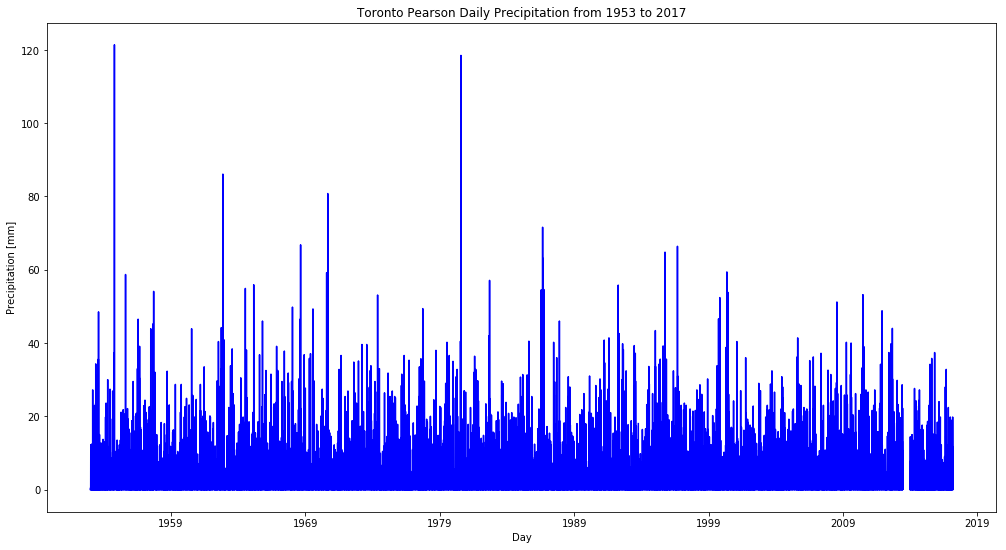

In [28]:
plt.figure(figsize=(17, 9))
plt.plot_date(train_data["Date/Time"], train_data["Total Precip (mm)"], fmt='b-')
plt.ylabel("Precipitation [mm]")
plt.xlabel("Day")
plt.title("Toronto Pearson Daily Precipitation from 1953 to 2017")